In [1]:
import os

import pandas as pd
import matplotlib.pylab as plt
import pylab as mpl  #导入中文字体，避免显示乱码
import matplotlib.dates as mdate
import numpy as np
mpl.rcParams['font.sans-serif']=['SimHei']  #设置为黑体字

In [3]:
doc_path='./data'
confimed_path=doc_path+'/confimed.csv'
cure_path=doc_path+'/cure.csv'
died_path=doc_path+'/died.csv'

missing_values = ["n/a", "na", "--"]

confime=pd.read_csv(confimed_path)
died=pd.read_csv(died_path)
cure=pd.read_csv(cure_path)

In [4]:
confime.index.size
confime.columns.size

876

In [6]:
def get_city_case(city,model,confime):
    #China France Germany,Korea, North
    confime_total=confime[confime['Country/Region']==city]
    # confime_total=confime
    if model=='confime'or model=='died':
        clip=-7
    elif model=='cure':
        clip=-311
    columns=confime_total.columns[4:clip].values
    loc=confime_total.loc[:,columns].sum()
    year_mouth=np.zeros((columns.size))
    day=np.zeros((columns.size))
    column=np.zeros((columns.size))

    for index,i in enumerate(columns):
        b=columns[index].split(r'/')
        if len(b[0])==1:
            year_mouth[index]='20'+b[2]+'0'+b[0]
        else:
             year_mouth[index]='20'+b[2]+b[0]
        day[index]=b[1]
    confime_sum=pd.DataFrame([loc.values,year_mouth,day],index=['People','Year_Mouth','Day'])
    confime_sum=pd.DataFrame(confime_sum.values.T,index=confime_sum.columns,columns=confime_sum.index)
    china_dict=confime_sum.groupby('Year_Mouth')
    y_value=china_dict.agg(np.mean)["People"].values
    return y_value,confime_sum
city='China'
model='confime'
y_value,confime_sum=get_city_case(city,model,confime)

In [8]:
a=confime_sum['People'].values[1:]
b=confime_sum['People'].values[:-1]
result=[i-j for i,j in zip(a,b)]
np.append(b,confime_sum['People'].values[-1])
# pd.read_csvsult

array([5.480000e+02, 6.430000e+02, 9.200000e+02, 1.406000e+03,
       2.075000e+03, 2.877000e+03, 5.509000e+03, 6.087000e+03,
       8.141000e+03, 9.802000e+03, 1.189100e+04, 1.663000e+04,
       1.971600e+04, 2.370700e+04, 2.744000e+04, 3.058700e+04,
       3.411000e+04, 3.681400e+04, 3.982900e+04, 4.235400e+04,
       4.438600e+04, 4.475900e+04, 5.989500e+04, 6.635800e+04,
       6.841300e+04, 7.051300e+04, 7.243400e+04, 7.421100e+04,
       7.461900e+04, 7.507700e+04, 7.555000e+04, 7.700100e+04,
       7.702200e+04, 7.724100e+04, 7.775400e+04, 7.816600e+04,
       7.860000e+04, 7.892800e+04, 7.935600e+04, 7.993200e+04,
       8.013600e+04, 8.026100e+04, 8.038600e+04, 8.053700e+04,
       8.069000e+04, 8.077000e+04, 8.082300e+04, 8.086000e+04,
       8.088700e+04, 8.092100e+04, 8.093200e+04, 8.094500e+04,
       8.097700e+04, 8.100300e+04, 8.103300e+04, 8.105800e+04,
       8.110200e+04, 8.115600e+04, 8.125000e+04, 8.130500e+04,
       8.143500e+04, 8.149300e+04, 8.158700e+04, 8.1658

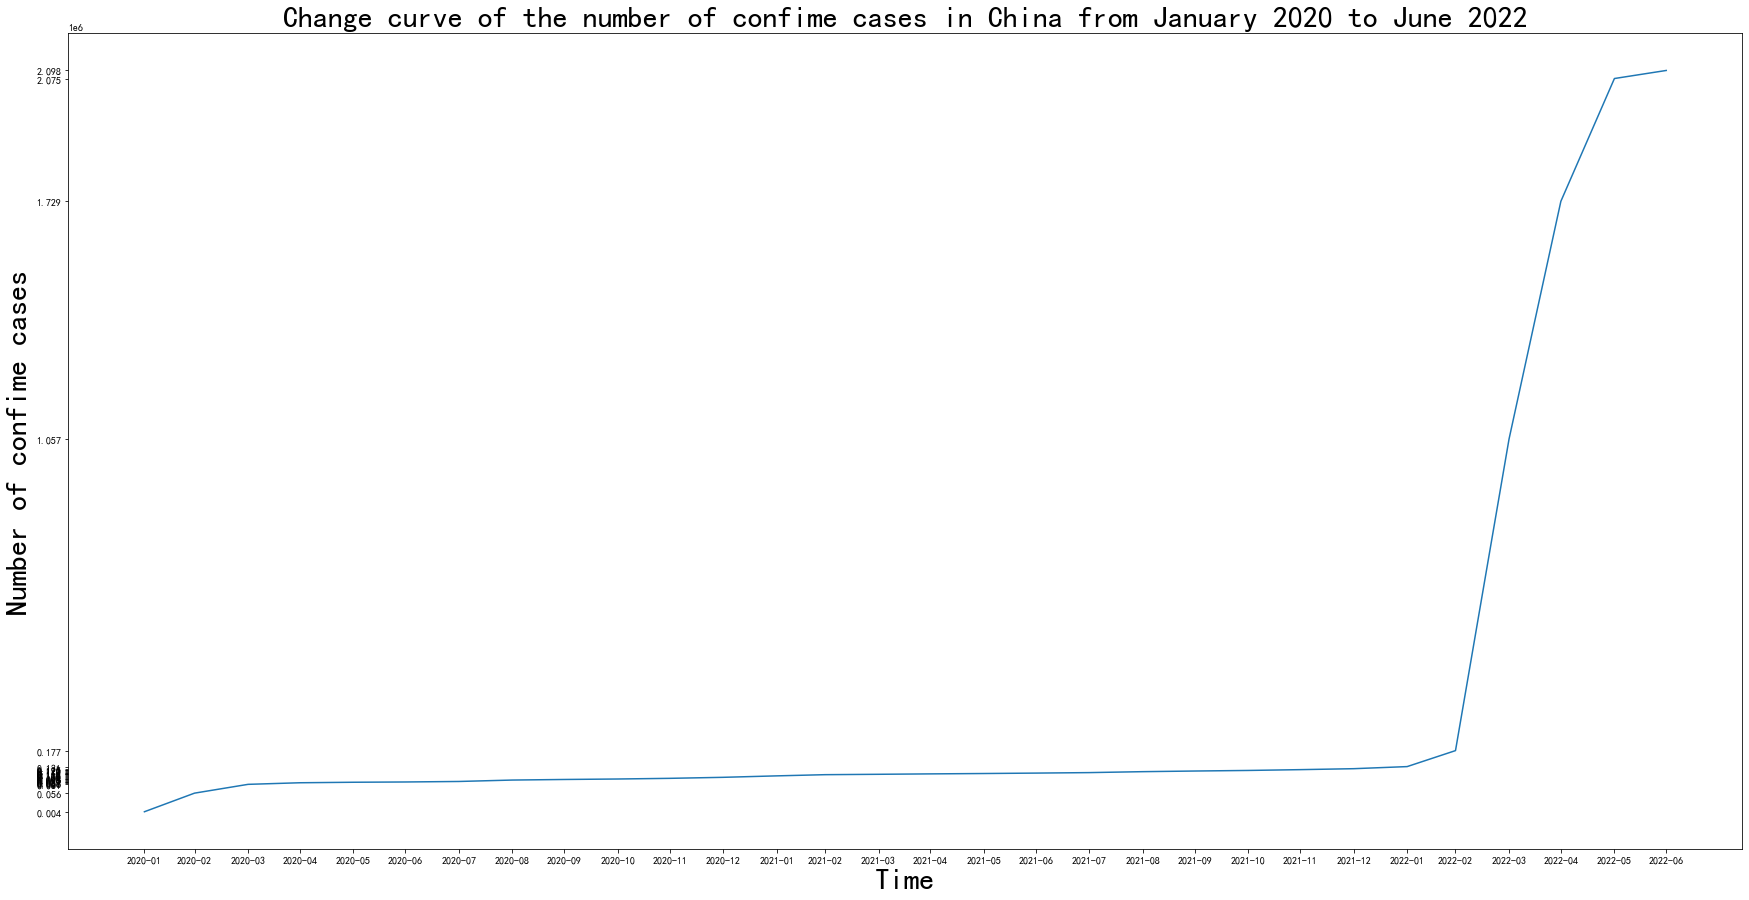

In [9]:
# china_dict=confime_sum.groupby('Year_Mouth')
# # print('china_dict',china_dict)
# y_value=china_dict.agg(np.mean)["People"].values
# print(y_value)

# ax = plt.gca()   #表明设置图片的各个轴，plt.gcf()表示图片本身
plt.figure(figsize=(30,15))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
# ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%M'))  # 横坐标标签显示的日期格式
if model=='confime'or model=='died':
    time=pd.date_range(start='2020-1',end='2022-7',freq='M')
    plt.title(f"Change curve of the number of {model} cases in {city} from January 2020 to June 2022",fontsize=30)
elif model=='cure':
    time=pd.date_range(start='2020-1',end='2021-9',freq='M')
    plt.title(f"Change curve of the number of {model} cases in {city} from January 2020 to September 2021",fontsize=30)
plt.xticks(time) #横坐标日期范围及间隔
plt.yticks(y_value)  #设置纵坐标，使用range()函数设置起始、结束范围及间隔步长

plt.xlabel("Time",fontsize=30)#x轴上的名字
plt.ylabel(f"Number of {model} cases",fontsize=30)#y轴上的名字

plt.plot(time,y_value)

min_num=y_value.min()
max_num=y_value.max()
# ax = plt.gca()
# ax.set_ylim(0,5)
# ax.set_ylim(min_num,max_num)
# plt.ylim((min_num-1000000, max_num))

save_path=f'./img/{model}/'+city+f'_{model}.png'
plt.savefig(save_path)
plt.show()


In [10]:
# df1=pd.DataFrame(y_value,columns=['累计确诊'])
# 疫情高峰时期
df1=confime_china_sum
a = (df1['People'] - df1.shift(1)['People']).iloc[1:].tolist()
df1.iloc[a.index(max((df1['People'] - df1.shift(1)['People']).iloc[1:]))]

NameError: name 'confime_china_sum' is not defined

In [21]:
city='China'
confime_china,_=get_city_case(city,'confime',confime)
model='confime'# died ,cure
died_china,_=get_city_case(city,'confime',died)
cure_chia,_=get_city_case(city,'confime',cure)
print(len(confime_china),len(died_china),len(cure_chia))

30 30 30


[   3800.8          56322.79310345   81185.06451613   85675.4
   87113.70967742   87870.83333333   89320.35483871   93310.35483871
   94945.5          96278.96774194   98155.6         101031.61290323
  105140.61290323  108499.          109597.          110755.43333333
  111775.90322581  112967.53333333  114364.25806452  117019.67741935
  118836.53333333  120458.61290323  122722.16666667  125418.
  131340.64516129  176512.35714286 1056815.93548387 1728506.56666667
 2075433.         2098210.75      ] [   88.9         1600.5862069   3177.03225806  3943.
  4637.51612903  4638.8         4646.16129032  4698.09677419
  4734.36666667  4739.          4741.53333333  4758.35483871
  4797.77419355  4828.07142857  4838.87096774  4843.56666667
  4846.          4846.2         4847.96774194  4848.
  4848.6         4849.          4849.          4849.
  4849.          4937.60714286  9293.12903226 13601.93333333
 14555.12903226 14606.75      ]


ValueError: x and y must have same first dimension, but have shapes (12,) and (30,)

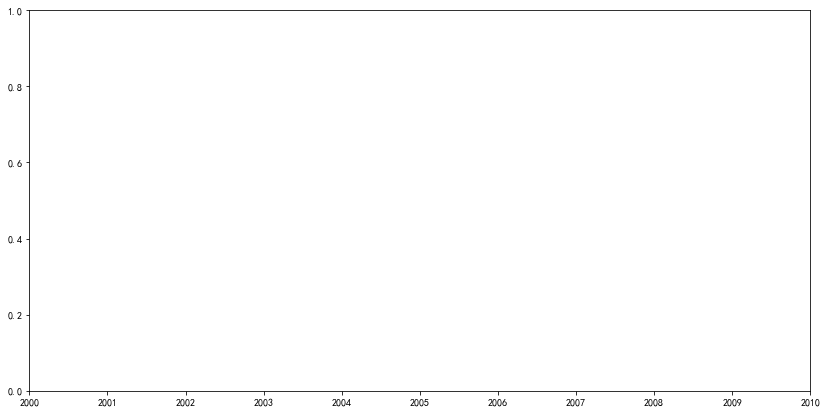

In [23]:
fig, ax = plt.subplots(figsize=(14, 7))
time=pd.date_range(start='2020-1',end='2021-9',freq='M')
print(confime_china,died_china)
ax.plot(time, confime_china, label='Cumulative diagnosis')
ax.plot(time, died_china, label='Death toll')
ax.plot(time, cure_chia, label='Number of patients cured')
ax.set_xlabel('Days from discovery')
ax.set_ylabel('Numbers')
ax.legend(fontsize=13)
ax.set_title("COVID-19's spread from 2020-01 to 2021-09",fontsize=20)
ax.grid(True)
plt.savefig('./img/中国变化趋势')
plt.show()